In [20]:
import tensorflow as tf
import numpy as np
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [22]:
model = tf.keras.models.load_model("models/DR_Two_Classes_recall_0.4424.h5")

In [23]:
model = tf.keras.models.load_model("models/DR_Two_Classes_recall_0.4424.h5")
class_list = ['No_DR', 'Mild_DR', 'Moderate_DR', 'Severe_DR', 'Proliferative_DR']
def generate_report():

    left_img = cv2.imread("10_left.jpeg")
    right_img = cv2.imread("10_right.jpeg")
    # parts = left_img.split("/")
    # file_name = parts[-1].split(".")
    # rev = file_name[0][::-1]
    # print(rev)
    # count = 0
    # for i in rev:
    #     if i == "_":
    #         print(count)
    #         break
    #     count += 1
    # f = file_name[0][0:len(file_name[0])-count-1]
    # # print(data[f])
    left_message = make_prediction("10_left.jpeg") 
    right_message = make_prediction("10_right.jpeg")
    plt.imshow(left_img)
    plt.imshow(right_img)
    print(left_message)
    print(right_message)
    

In [24]:
def make_prediction(img_path):
    img = cv2.imread(img_path)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=cv2.resize(img, (256,256))
    # img=img/255.0
    img=np.expand_dims(img, axis=0)
    prediction =model.predict (img, batch_size=1, verbose=0)
    pred=np.argmax(prediction)
    return 'for file '+ img_path+ ' the predicted class is '+ class_list[pred]+ ' with a probability of '+ str(prediction[0][pred])
# print(a_file)

for file 10_left.jpeg the predicted class is No_DR with a probability of 0.20673817
for file 10_right.jpeg the predicted class is No_DR with a probability of 0.20673817
None


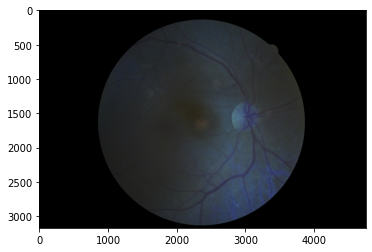

In [25]:
print(generate_report())